# Explore here

In [26]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

import spotipy
from spotipy import SpotifyClientCredentials

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Connection

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

sp=spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id, client_secret))

In [28]:
artist_uri = '7dzq55YG3wjViqexDwiycQ'

results = sp.artist_top_tracks(artist_uri)
top_tracks = results['tracks']

print(top_tracks)

[{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7dzq55YG3wjViqexDwiycQ'}, 'href': 'https://api.spotify.com/v1/artists/7dzq55YG3wjViqexDwiycQ', 'id': '7dzq55YG3wjViqexDwiycQ', 'name': 'Ivete Sangalo', 'type': 'artist', 'uri': 'spotify:artist:7dzq55YG3wjViqexDwiycQ'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/3CDoRporvSjdzTrm99a3gi'}, 'href': 'https://api.spotify.com/v1/artists/3CDoRporvSjdzTrm99a3gi', 'id': '3CDoRporvSjdzTrm99a3gi', 'name': 'LUDMILLA', 'type': 'artist', 'uri': 'spotify:artist:3CDoRporvSjdzTrm99a3gi'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/6FEJSBFIqZe9GYN2xaAP52'}, 'href': 'https://api.spotify.com/v1/albums/6FEJSBFIqZe9GYN2xaAP52', 'id': '6FEJSBFIqZe9GYN2xaAP52', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2733bc15b5807bd7e3500944a69', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e023bc15b5807bd7e3500944a69

In [29]:
# Getting the name, popularity and duration (conversion included)

filtered_tracks=[]     

for track in top_tracks:
    filtered_track = {}
    for k, v in track.items():
        if k in ["duration_ms"]:
            filtered_track[k] = (v / (1000*60)) %60
        elif k in ["name", "popularity"]:
            filtered_track[k] = v
        else:
            continue
    filtered_tracks.append(filtered_track)

print(filtered_tracks)

tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

[{'duration_ms': 2.7964333333333333, 'name': 'Macetando', 'popularity': 74}, {'duration_ms': 3.625766666666667, 'name': 'Color Esperanza 2020', 'popularity': 68}, {'duration_ms': 3.9633, 'name': 'Cria Da Ivete - Ao Vivo', 'popularity': 59}, {'duration_ms': 3.826433333333333, 'name': 'Não Precisa Mudar - Ao Vivo', 'popularity': 30}, {'duration_ms': 2.97, 'name': 'Vingança Do Amor', 'popularity': 49}, {'duration_ms': 4.104666666666667, 'name': 'Quando A Chuva Passar', 'popularity': 51}, {'duration_ms': 5.539766666666667, 'name': 'Faraó Divindade Do Egito / Ladeira Do Pelô / Doce Obsessão - Ao Vivo', 'popularity': 51}, {'duration_ms': 2.8786666666666667, 'name': 'O Mundo Vai', 'popularity': 51}, {'duration_ms': 4.157333333333334, 'name': 'Se Eu Não Te Amasse Tanto Assim', 'popularity': 50}, {'duration_ms': 5.152433333333334, 'name': 'Pais Tropical / Arerê / Taj Mahal - Ao Vivo', 'popularity': 25}]


In [30]:
# Converting the results into a dataframe

ivete_tracks=pd.DataFrame.from_dict(filtered_tracks)

In [31]:
# Sorting the tracks to get the top 3

ivete_tracks.sort_values(by=['popularity'], ascending=False).head(3)

,duration_ms,name,popularity
0,2.796433,Macetando,74
1,3.625767,Color Esperanza 2020,68
2,3.963300,Cria Da Ivete - Ao Vivo,59


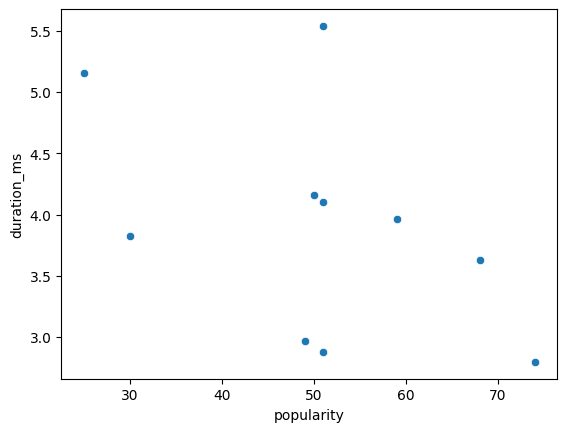

In [32]:
# Plotting to look for a possible correlation between the duration of the song and its popularity

sns.scatterplot(data = ivete_tracks, x = 'popularity', y = 'duration_ms')

plt.show()

As shown, there is no correlation between the duration of the song and its popularity.